<a href="https://colab.research.google.com/github/Santha-Lakshmi-S/EV-Data-Analysis/blob/main/EDA_Project_2_Analysis_of_Electric_Vehicle_(EV)_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## EDA Project 2 - Analysis of Electric Vehicle (EV) Data

In [ ]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/dataset.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

   VIN (1-10)     County      City State  Postal Code  Model Year       Make  \
0  JTMEB3FV6N     Monroe  Key West    FL        33040        2022     TOYOTA   
1  1G1RD6E45D      Clark  Laughlin    NV        89029        2013  CHEVROLET   
2  JN1AZ0CP8B     Yakima    Yakima    WA        98901        2011     NISSAN   
3  1G1FW6S08H     Skagit  Concrete    WA        98237        2017  CHEVROLET   
4  3FA6P0SU1K  Snohomish   Everett    WA        98201        2019       FORD   

        Model                   Electric Vehicle Type  \
0  RAV4 PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   
1        VOLT  Plug-in Hybrid Electric Vehicle (PHEV)   
2        LEAF          Battery Electric Vehicle (BEV)   
3     BOLT EV          Battery Electric Vehicle (BEV)   
4      FUSION  Plug-in Hybrid Electric Vehicle (PHEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible            42.0   
1           Clean Alternative Fuel

Univariate Analysis: Distribution of Electric Vehicle Types

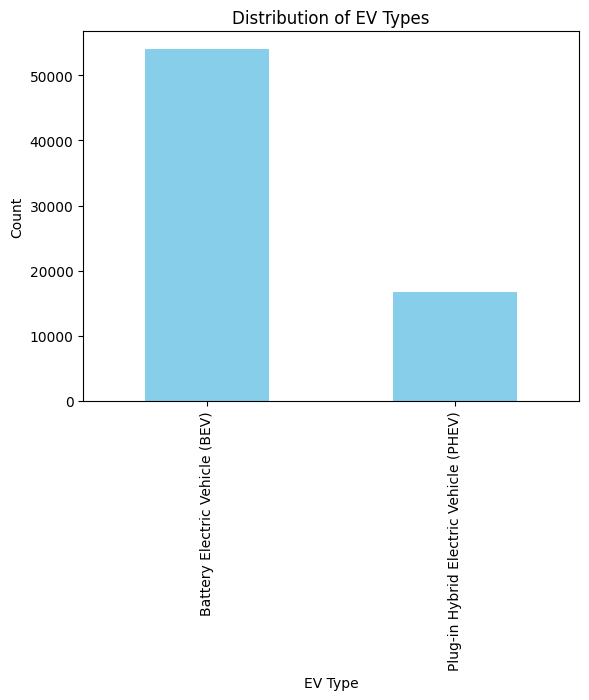

In [ ]:
ev_type_counts = data['Electric Vehicle Type'].value_counts()
ev_type_counts.plot(kind='bar', color='skyblue', title='Distribution of EV Types')
plt.xlabel('EV Type')
plt.ylabel('Count')
plt.show()

Distribution of EV Make

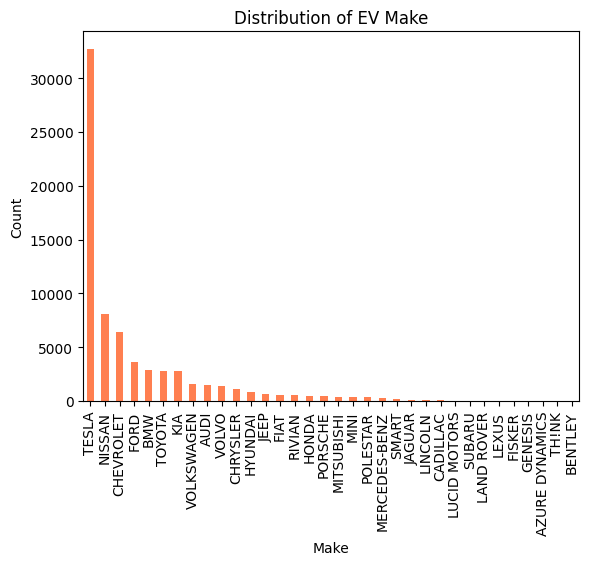

In [ ]:
make_counts = data['Make'].value_counts()
make_counts.plot(kind='bar', color='coral', title='Distribution of EV Make')
plt.xlabel('Make')
plt.ylabel('Count')
plt.show()

Distribution of Electric Range

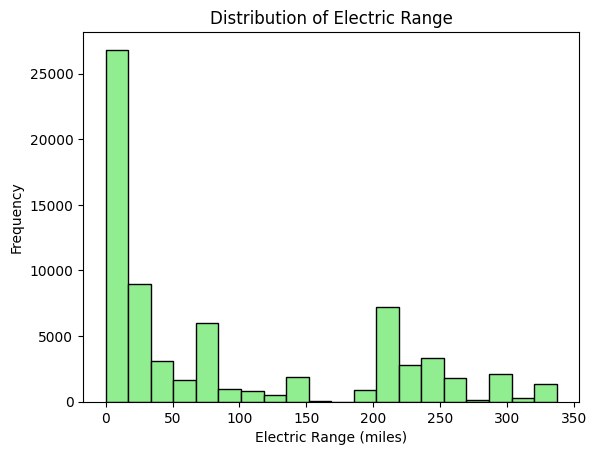

In [ ]:
plt.hist(data['Electric Range'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Electric Range')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Frequency')
plt.show()

Choropleth Map Visualization: EV Distribution by State

In [ ]:
state_counts = data['State'].value_counts().reset_index()
state_counts.columns = ['State', 'Count']

fig = px.choropleth(
    state_counts,
    locations='State',
    locationmode='USA-states',
    color='Count',
    hover_name='State',
    color_continuous_scale='Viridis',
    scope='usa',
    title='EV Distribution by State'
)
fig.show()

Electric Vehicle Eligibility Analysis

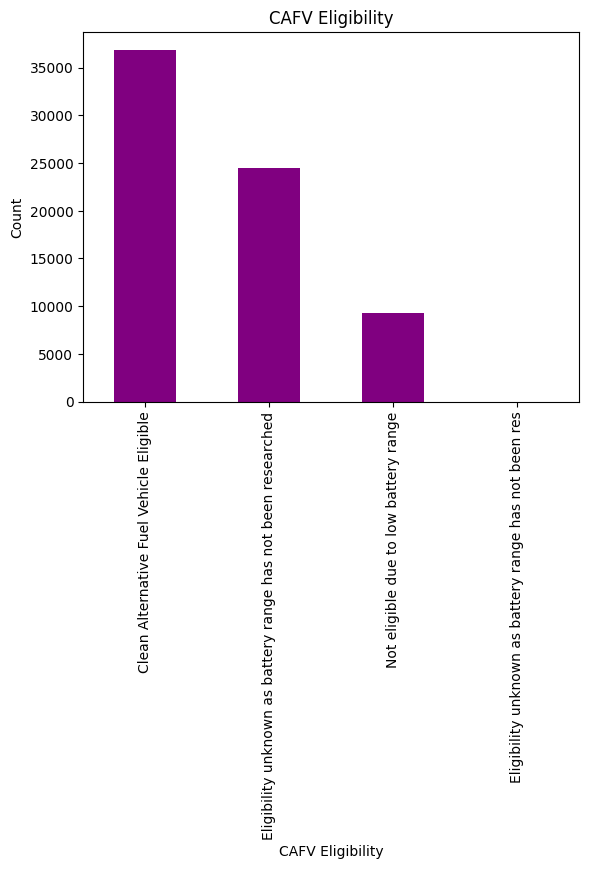

In [ ]:
cafv_eligibility_counts = data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()
cafv_eligibility_counts.plot(kind='bar', color='purple', title='CAFV Eligibility')
plt.xlabel('CAFV Eligibility')
plt.ylabel('Count')
plt.show()

Average Electric Range by Vehicle Type

In [ ]:
avg_range = data.groupby('Electric Vehicle Type')['Electric Range'].mean().reset_index()

fig = px.bar(
    avg_range,
    x='Electric Vehicle Type',
    y='Electric Range',
    color='Electric Vehicle Type',
    title='Average Electric Range by Vehicle Type',
    labels={'Electric Range': 'Average Electric Range (miles)'}
)
fig.show()

Most Common EV Models

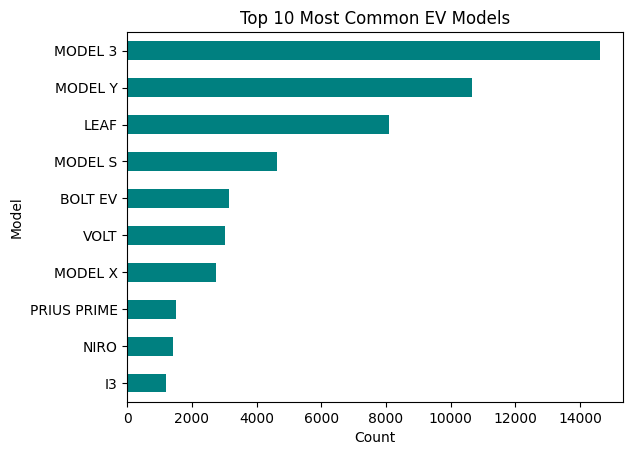

In [ ]:
model_counts = data['Model'].value_counts().nlargest(10)
model_counts.plot(kind='barh', color='teal', title='Top 10 Most Common EV Models')
plt.xlabel('Count')
plt.ylabel('Model')
plt.gca().invert_yaxis()
plt.show()

Analysis of EV Locations by Utility Providers

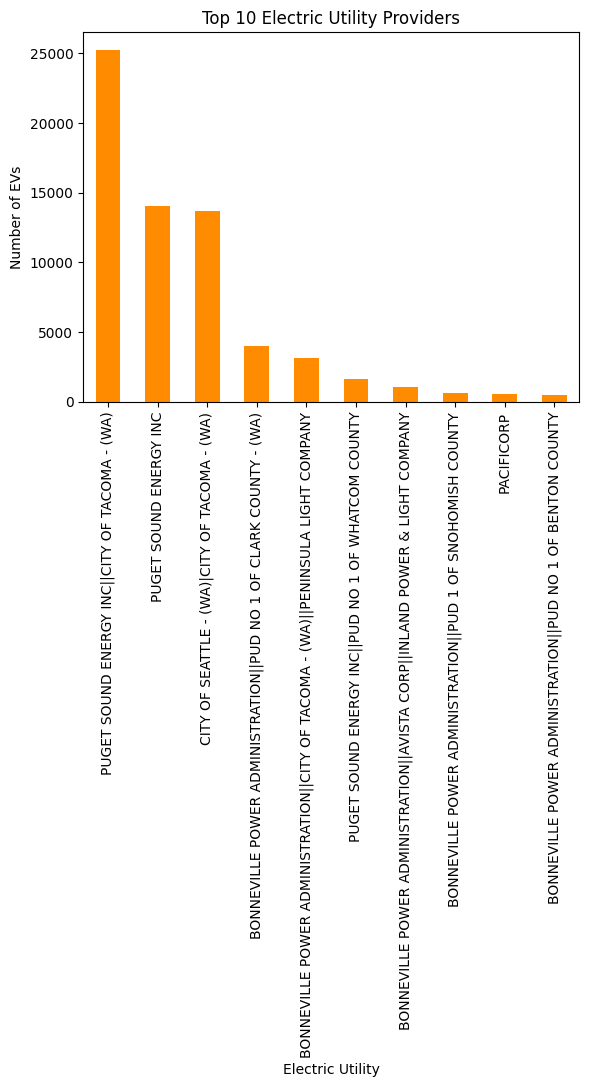

In [ ]:
utility_counts = data['Electric Utility'].value_counts().nlargest(10)
utility_counts.plot(kind='bar', color='darkorange', title='Top 10 Electric Utility Providers')
plt.xlabel('Electric Utility')
plt.ylabel('Number of EVs')
plt.show()

Mapping EV Locations Using Latitude and Longitude

In [ ]:
data[['Latitude', 'Longitude']] = data['Vehicle Location'].str.extract(r'POINT \(([-\d.]+) ([-\d.]+)\)')

fig = px.scatter_geo(
    data,
    lat='Latitude',
    lon='Longitude',
    hover_name='City',
    hover_data=['Make', 'Model', 'Electric Vehicle Type'],
    color='Electric Vehicle Type',
    title='Electric Vehicles by Location',
    scope='usa'
)
fig.show()

Correlation Analysis: Electric Range and Model Year

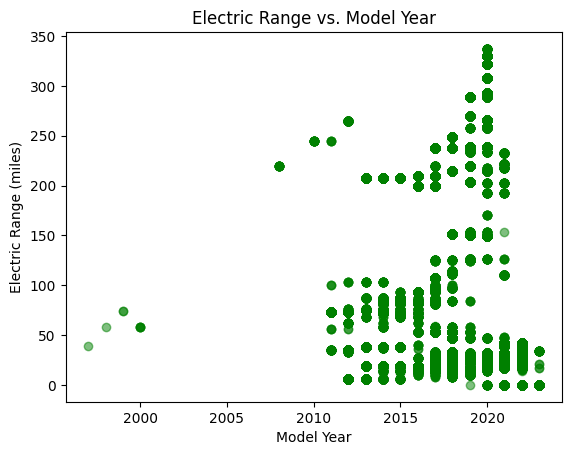

In [ ]:
plt.scatter(data['Model Year'], data['Electric Range'], alpha=0.5, color='green')
plt.title('Electric Range vs. Model Year')
plt.xlabel('Model Year')
plt.ylabel('Electric Range (miles)')
plt.show()

Box Plot: Electric Range by Make

In [ ]:
fig = px.box(
    data,
    x='Make',
    y='Electric Range',
    color='Make',
    title='Distribution of Electric Range by Make',
    labels={'Electric Range': 'Electric Range (miles)'}
)
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()

Racing Bar Plot: EV Growth by Make Over the Years

In [ ]:
yearly_make_data = data.groupby(['Model Year', 'Make']).size().reset_index(name='Count')

fig = px.bar(
    yearly_make_data,
    x='Make',
    y='Count',
    color='Make',
    animation_frame='Model Year',
    animation_group='Make',
    title='Electric Vehicle Growth by Make Over the Years',
    labels={'Count': 'Number of EVs'},
    height=600
)
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()

Heatmap: Electric Range Across States

In [ ]:
state_avg_range = data.groupby('State')['Electric Range'].mean().reset_index()

fig = px.choropleth(
    state_avg_range,
    locations='State',
    locationmode='USA-states',
    color='Electric Range',
    hover_name='State',
    color_continuous_scale='Blues',
    scope='usa',
    title='Average Electric Range Across States'
)
fig.show()

In [37]:
!pip install bar_chart_race

import bar_chart_race as bcr

In [38]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [39]:
car_per_year = df.groupby(['Make', 'Model Year']).size().reset_index(name='number_of_Vehicles')

In [40]:
print(car_per_year)

      Make  Model Year  number_of_Vehicles
0     AUDI        2016                 214
1     AUDI        2017                 187
2     AUDI        2018                 174
3     AUDI        2019                 392
4     AUDI        2020                 224
..     ...         ...                 ...
204  VOLVO        2019                 190
205  VOLVO        2020                 162
206  VOLVO        2021                 580
207  VOLVO        2022                 882
208  VOLVO        2023                  21

[209 rows x 3 columns]


In [41]:
fig = px.bar(car_per_year,
             y='Make',
             x='number_of_Vehicles',
             color='Make',
             animation_frame='Model Year',
             orientation='h',
             title='EV Makes and their Count Over the Years',
             labels={'Number_of_Vehicles': 'Number of EV Vehicles'},
             range_x=[0, 3000]
            )

fig.update_traces(texttemplate='%{x}',
                  textposition='outside',
                  textfont_size=16)

# Adjust the layout for improved visibility and emphasis on movement
fig.update_layout(
    xaxis=dict(showgrid=True, gridcolor='LightGray'),
    yaxis_title='EV Makes',
    xaxis_title='Number of EV Vehicles',
    showlegend=False,
    title_x=0.5,
    title_font=dict(size=20),
    margin=dict(l=50, r=50, t=50, b=50),
    width=800,
    height=600
)

fig.show()